In [1]:
%matplotlib notebook
%load_ext autoreload
%pwd

'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks'

In [2]:
import sys
import pandas as pd
sys.path.append('../../param_search')
import param_search as ps

## Setup experiment

[[Setup](#Setup-experiment)] [[Submit](#Submit-jobs)] [[Monitor](#Monitor-jobs)] [[Analyze](#Analyze-results)]

In [3]:
# define a job template and name format
template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -x v034
#SBATCH --time=48:00:00
#SBATCH -o %J.stdout
#SBATCH -e %J.stderr
#SBATCH --mail-type=all

hostname
pwd
module load anaconda3
conda activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/4DCT
nvidia-smi

mpirun -n 1 python ../../../train1d.py \\
    --out_name {job_name} \\
    --pde_name {pde_name} \\
    --image_size {image_size} \\
    --batch_size {batch_size} \\
    --n_nodes {n_nodes}

echo Done
'''
name_format = 'train1d_{pde_name}_{image_size}_{n_nodes}_{batch_size}'

In [74]:
param_space = ps.ParamSpace(
    pde_name='poisson',
    image_size=[128, 256, 512, 1024],
    n_nodes=[128, 256, 512, 1024],
    batch_size=[64, 128, 256],
)

for p in param_space:
    print(name_format.format(**p))

print(len(param_space))

train1d_poisson_128_128_64
train1d_poisson_128_128_128
train1d_poisson_128_128_256
train1d_poisson_128_256_64
train1d_poisson_128_256_128
train1d_poisson_128_256_256
train1d_poisson_128_512_64
train1d_poisson_128_512_128
train1d_poisson_128_512_256
train1d_poisson_128_1024_64
train1d_poisson_128_1024_128
train1d_poisson_128_1024_256
train1d_poisson_256_128_64
train1d_poisson_256_128_128
train1d_poisson_256_128_256
train1d_poisson_256_256_64
train1d_poisson_256_256_128
train1d_poisson_256_256_256
train1d_poisson_256_512_64
train1d_poisson_256_512_128
train1d_poisson_256_512_256
train1d_poisson_256_1024_64
train1d_poisson_256_1024_128
train1d_poisson_256_1024_256
train1d_poisson_512_128_64
train1d_poisson_512_128_128
train1d_poisson_512_128_256
train1d_poisson_512_256_64
train1d_poisson_512_256_128
train1d_poisson_512_256_256
train1d_poisson_512_512_64
train1d_poisson_512_512_128
train1d_poisson_512_512_256
train1d_poisson_512_1024_64
train1d_poisson_512_1024_128
train1d_poisson_512_1024

## Submit jobs

[[Setup](#Setup-experiment)] [[Submit](#Submit-jobs)] [[Monitor](#Monitor-jobs)] [[Analyze](#Analyze-results)]

In [90]:
expt_name = ['2024-03-08_poisson', '2024-03-09_poisson', '2024-03-12_poisson'][-1]

In [85]:
if False:
    jobs = ps.submit(template, name_format, param_space, work_dir=expt_name)
    jobs.to_csv(f'{expt_name}.jobs')


,pde_name,image_size,n_nodes,batch_size,job_name,job_id,partition,job_state,node_id,runtime,work_dir,array_idx
0,poisson,128,128,64,train1d_poisson_128_128_64,22919052,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN
1,poisson,128,128,128,train1d_poisson_128_128_128,22919053,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN
2,poisson,128,128,256,train1d_poisson_128_128_256,22919054,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN
3,poisson,128,256,64,train1d_poisson_128_256_64,22919055,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN
4,poisson,128,256,128,train1d_poisson_128_256_128,22919056,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN
5,poisson,128,256,256,train1d_poisson_128_256_256,22919057,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN
6,poisson,128,512,64,train1d_poisson_128_512_64,22919058,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN
7,poisson,128,512,128,train1d_poisson_128_512_128,22919059,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN
8,poisson,128,512,256,train1d_poisson_128_512_256,22919060,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN
9,poisson,128,1024,64,train1d_poisson_128_1024_64,22919061,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN


## Monitor jobs

[[Setup](#Setup-experiment)] [[Submit](#Submit-jobs)] [[Monitor](#Monitor-jobs)] [[Analyze](#Analyze-results)]

In [6]:
expt_name = ['2024-03-08_poisson', '2024-03-09_poisson', '2024-03-12_poisson'][-1]

In [7]:
jobs = pd.read_csv(f'{expt_name}.jobs', index_col=0)
status = ps.status(jobs, parse_stderr=True)
status

,index,pde_name,image_size,n_nodes,batch_size,job_name,partition,job_state,node_id,runtime,work_dir,array_idx,stdout,stderr
job_id,,,,,,,,,,,,,,
22919052,0,poisson,128,128,64,train1d_poisson_128_128_64,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v033.ib.bridges2.psc.edu\n/ocean/projects/asc1...,
22919053,1,poisson,128,128,128,train1d_poisson_128_128_128,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v033.ib.bridges2.psc.edu\n/ocean/projects/asc1...,
22919054,2,poisson,128,128,256,train1d_poisson_128_128_256,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v031.ib.bridges2.psc.edu\n/ocean/projects/asc1...,
22919055,3,poisson,128,256,64,train1d_poisson_128_256_64,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v031.ib.bridges2.psc.edu\n/ocean/projects/asc1...,
22919056,4,poisson,128,256,128,train1d_poisson_128_256_128,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v031.ib.bridges2.psc.edu\n/ocean/projects/asc1...,
22919057,5,poisson,128,256,256,train1d_poisson_128_256_256,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v031.ib.bridges2.psc.edu\n/ocean/projects/asc1...,
22919058,6,poisson,128,512,64,train1d_poisson_128_512_64,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v031.ib.bridges2.psc.edu\n/ocean/projects/asc1...,
22919059,7,poisson,128,512,128,train1d_poisson_128_512_128,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v031.ib.bridges2.psc.edu\n/ocean/projects/asc1...,
22919060,8,poisson,128,512,256,train1d_poisson_128_512_256,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v031.ib.bridges2.psc.edu\n/ocean/projects/asc1...,


In [8]:
status['job_state'] = status['job_state'].fillna('DONE')
status['stderr'] = status['stderr'].fillna('N/A')
status.groupby(['job_state', 'image_size', 'n_nodes', 'stderr'])[['job_name']].count()

job_name
job_state image_size n_nodes stderr          
DONE      128        128                    3
                     256                    3
                     512                    3
                     1024                   3
          256        128                    3
                     256                    3
                     512                    3
                     1024                   3
          512        128                    3
                     256                    3
                     512                    3
                     1024                   3
          1024       128                    3
                     256                    3
                     512                    3
                     1024                   3

In [9]:
print(status.iloc[0].stderr)

## Analyze results

[[Setup](#Setup-experiment)] [[Submit](#Submit-jobs)] [[Monitor](#Monitor-jobs)] [[Analyze](#Analyze-results)]

In [10]:
m = ps.metrics(jobs, sep='\t')
m

,pde_name,image_size,n_nodes,batch_size,job_name,job_id,partition,job_state,node_id,runtime,work_dir,array_idx,epoch,phase,u_loss,mu_loss,t_model,t_loss,t_grad,t_optim
0,poisson,128,128,64,train1d_poisson_128_128_64,22919052,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,0.000000,train,0.009514,1.208242,7.526374,0.623156,7.130759,1.948564
1,poisson,128,128,64,train1d_poisson_128_128_64,22919052,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,0.007092,train,0.011694,1.627577,0.201888,0.033427,0.848133,0.000495
2,poisson,128,128,64,train1d_poisson_128_128_64,22919052,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,0.014184,train,0.010370,1.337310,0.203189,0.000417,0.623567,0.000546
3,poisson,128,128,64,train1d_poisson_128_128_64,22919052,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,0.021277,train,0.011133,1.449446,0.206238,0.000591,0.628820,0.000593
4,poisson,128,128,64,train1d_poisson_128_128_64,22919052,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,0.028369,train,0.013075,1.802813,0.201915,0.000424,0.622286,0.000562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409794,poisson,1024,1024,256,train1d_poisson_1024_1024_256,22919099,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,99.972222,train,0.001954,0.467625,0.181389,0.001673,0.441703,0.000486
409795,poisson,1024,1024,256,train1d_poisson_1024_1024_256,22919099,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,100.000000,test,0.001476,0.310312,1.133690,0.000462,NaN,NaN
409796,poisson,1024,1024,256,train1d_poisson_1024_1024_256,22919099,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,100.000000,test,0.001521,0.302251,1.146793,0.000165,NaN,NaN
409797,poisson,1024,1024,256,train1d_poisson_1024_1024_256,22919099,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,100.000000,test,0.001496,0.310346,1.136603,0.000171,NaN,NaN


In [11]:
d = m.groupby(['pde_name', 'image_size', 'n_nodes', 'batch_size', 'job_name'])[['epoch']].max()
d

epoch
pde_name image_size n_nodes batch_size job_name                            
poisson  128        128     64         train1d_poisson_128_128_64     100.0
                            128        train1d_poisson_128_128_128    100.0
                            256        train1d_poisson_128_128_256    100.0
                    256     64         train1d_poisson_128_256_64     100.0
                            128        train1d_poisson_128_256_128    100.0
                            256        train1d_poisson_128_256_256    100.0
                    512     64         train1d_poisson_128_512_64     100.0
                            128        train1d_poisson_128_512_128    100.0
                            256        train1d_poisson_128_512_256    100.0
                    1024    64         train1d_poisson_128_1024_64    100.0
                            128        train1d_poisson_128_1024_128   100.0
                            256        train1d_poisson_128_1024_256   100.0
         256        128     64         train1d_poisson_256_128_64      83.0
                            128        train1d_poisson_256_128_128     80.0
                            256        train1d_poisson_256_128_256     91.0
                    256     64         train1d_poisson_256_256_64      53.0
                            128        train1d_poisson_256_256_128     57.0
                            256        train1d_poisson_256_256_256     35.0
                    512     64         train1d_poisson_256_512_64      12.0
                            128        train1d_poisson_256_512_128    100.0
                            256        train1d_poisson_256_512_256    100.0
                    1024    64         train1d_poisson_256_1024_64    100.0
                            128        train1d_poisson_256_1024_128   100.0
                            256        train1d_poisson_256_1024_256   100.0
         512        128     64         train1d_poisson_512_128_64     100.0
                            128        train1d_poisson_512_128_128    100.0
                            256        train1d_poisson_512_128_256    100.0
                    256     64         train1d_poisson_512_256_64     100.0
                            128        train1d_poisson_512_256_128    100.0
                            256        train1d_poisson_512_256_256    100.0
                    512     64         train1d_poisson_512_512_64     100.0
                            128        train1d_poisson_512_512_128    100.0
                            256        train1d_poisson_512_512_256    100.0
                    1024    64         train1d_poisson_512_1024_64    100.0
                            128        train1d_poisson_512_1024_128   100.0
                            256        train1d_poisson_512_1024_256   100.0
         1024       128     64         train1d_poisson_1024_128_64    100.0
                            128        train1d_poisson_1024_128_128   100.0
                            256        train1d_poisson_1024_128_256   100.0
                    256     64         train1d_poisson_1024_256_64    100.0
                            128        train1d_poisson_1024_256_128   100.0
                            256        train1d_poisson_1024_256_256   100.0
                    512     64         train1d_poisson_1024_512_64    100.0
                            128        train1d_poisson_1024_512_128   100.0
                            256        train1d_poisson_1024_512_256   100.0
                    1024    64         train1d_poisson_1024_1024_64   100.0
                            128        train1d_poisson_1024_1024_128  100.0
                            256        train1d_poisson_1024_1024_256  100.0

In [12]:
unfinished_jobs = d[d.epoch < 100]
unfinished_jobs

epoch
pde_name image_size n_nodes batch_size job_name                          
poisson  256        128     64         train1d_poisson_256_128_64    83.0
                            128        train1d_poisson_256_128_128   80.0
                            256        train1d_poisson_256_128_256   91.0
                    256     64         train1d_poisson_256_256_64    53.0
                            128        train1d_poisson_256_256_128   57.0
                            256        train1d_poisson_256_256_256   35.0
                    512     64         train1d_poisson_256_512_64    12.0

<IPython.core.display.Javascript object>


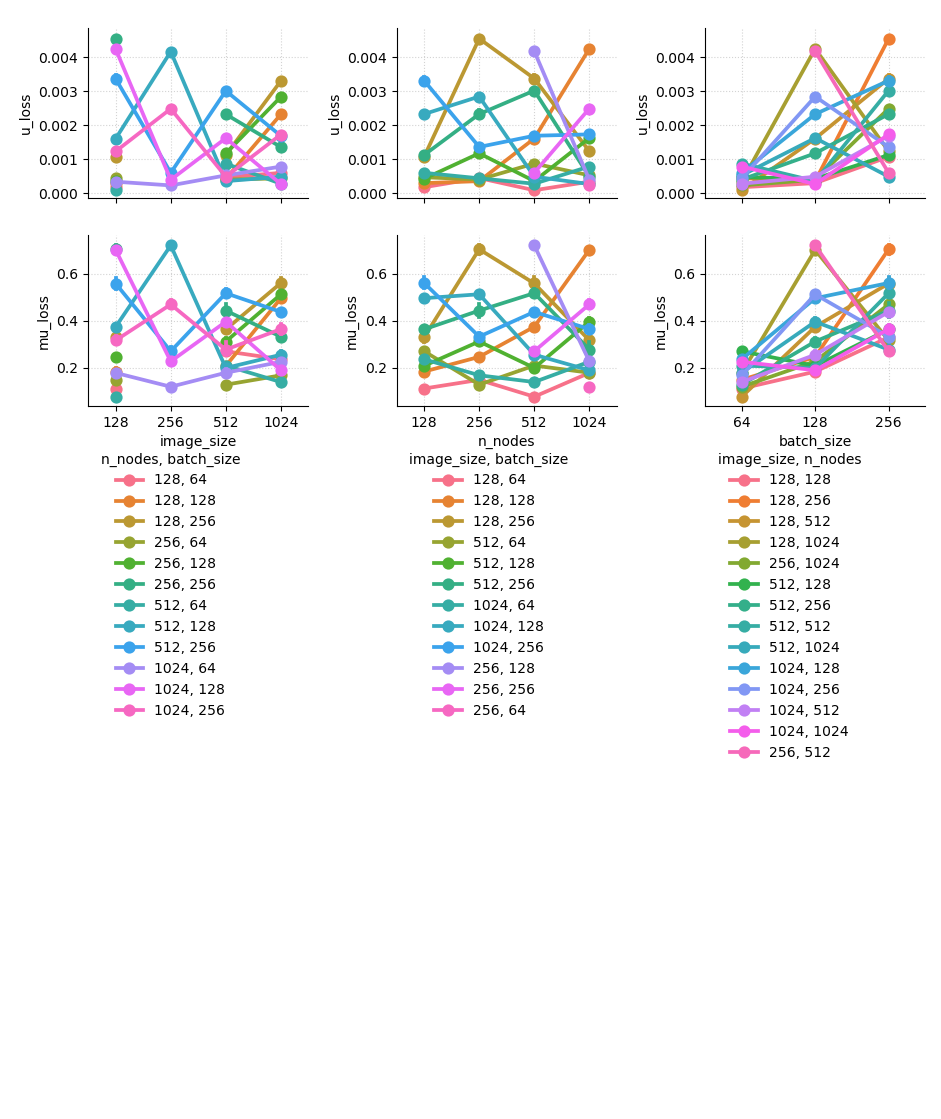

In [20]:
%autoreload
fig = ps.plot(
    m[(m.phase == 'train') & (m.epoch > 99)],
    x=['image_size', 'n_nodes', 'batch_size'],
    y=['u_loss', 'mu_loss'],
    legend=True,
    legend_kws=dict(bbox_to_anchor=(0, -0.2)),
    tight=True
)

<IPython.core.display.Javascript object>


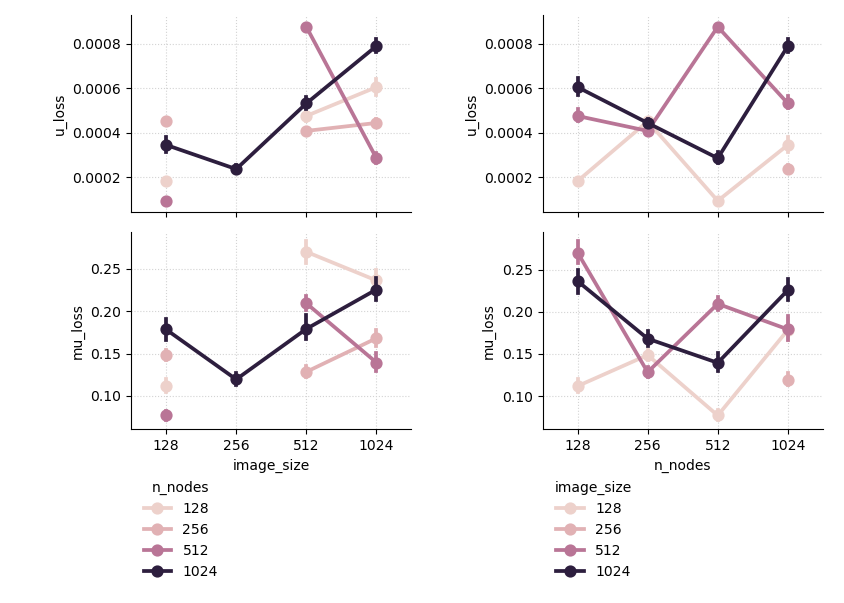

In [15]:
%autoreload
fig = ps.plot(
    m[(m.phase == 'train') & (m.epoch > 99) & (m.batch_size == 64)],
    x=['image_size', 'n_nodes'],
    y=['u_loss', 'mu_loss'],
    legend=True,
    legend_kws=dict(bbox_to_anchor=(0, -0.2)),
    tight=True
)

<IPython.core.display.Javascript object>


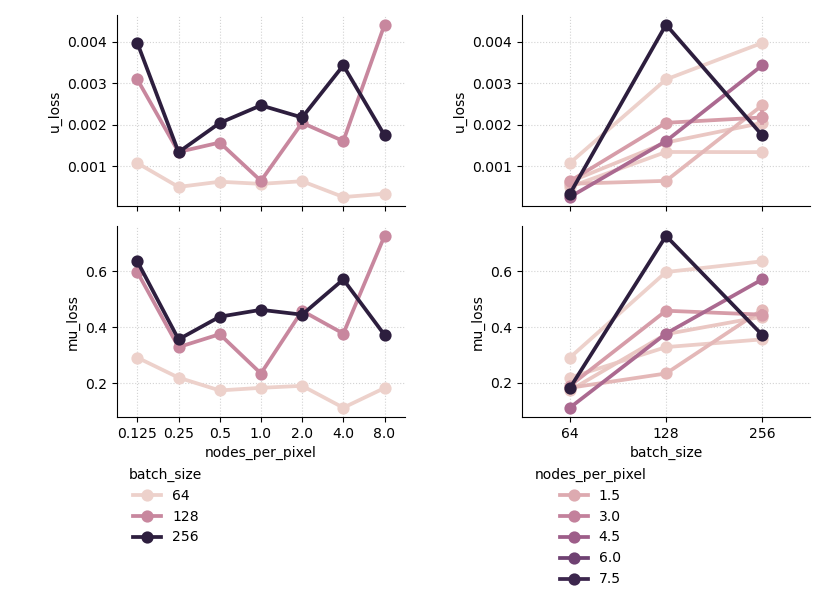

In [16]:
%autoreload
m['nodes_per_pixel'] = m['n_nodes'] / m['image_size']
fig = ps.plot(
    m[(m.phase == 'train') & (m.epoch > 90)],
    x=['nodes_per_pixel', 'batch_size'],
    y=['u_loss', 'mu_loss'],
    legend=True,
    legend_kws=dict(bbox_to_anchor=(0, -0.2)),
    tight=True
)

In [17]:
m[(m.phase == 'train') & (m.epoch > 90)].groupby(['n_nodes', 'image_size', 'nodes_per_pixel', 'batch_size'])[['u_loss', 'mu_loss']].mean()

u_loss   mu_loss
n_nodes image_size nodes_per_pixel batch_size                    
128     128        1.000           64          0.000369  0.134447
                                   128         0.000366  0.192505
                                   256         0.001420  0.361678
        256        0.500           256         0.001322  0.319769
        512        0.250           64          0.000406  0.250800
                                   128         0.000418  0.212024
                                   256         0.000796  0.321007
        1024       0.125           64          0.001075  0.290990
                                   128         0.003090  0.597349
                                   256         0.003971  0.635622
256     128        2.000           64          0.000658  0.181386
                                   128         0.000714  0.304930
                                   256         0.005085  0.767933
        512        0.500           64          0.000453  0.136301
                                   128         0.002354  0.457215
                                   256         0.002935  0.509687
        1024       0.250           64          0.000593  0.187767
                                   128         0.002265  0.445013
                                   256         0.001879  0.391279
512     128        4.000           64          0.000110  0.079954
                                   128         0.002463  0.479471
                                   256         0.003879  0.616356
        256        2.000           128         0.004422  0.755204
                                   256         0.000949  0.301598
        512        1.000           64          0.000494  0.171632
                                   128         0.000936  0.276173
                                   256         0.003629  0.588235
        1024       0.500           64          0.000797  0.210412
                                   128         0.000786  0.292536
                                   256         0.001219  0.376887
1024    128        8.000           64          0.000334  0.182031
                                   128         0.004411  0.726635
                                   256         0.001744  0.372341
        256        4.000           64          0.000402  0.142995
                                   128         0.000746  0.274532
                                   256         0.002981  0.525469
        512        2.000           64          0.000616  0.198399
                                   128         0.000999  0.316058
                                   256         0.000488  0.264778
        1024       1.000           64          0.000858  0.242067
                                   128         0.000634  0.233312
                                   256         0.002349  0.436766

In [18]:
m.columns

Index(['pde_name', 'image_size', 'n_nodes', 'batch_size', 'job_name', 'job_id',
       'partition', 'job_state', 'node_id', 'runtime', 'work_dir', 'array_idx',
       'epoch', 'phase', 'u_loss', 'mu_loss', 't_model', 't_loss', 't_grad',
       't_optim', 'nodes_per_pixel'],
      dtype='object')

<IPython.core.display.Javascript object>


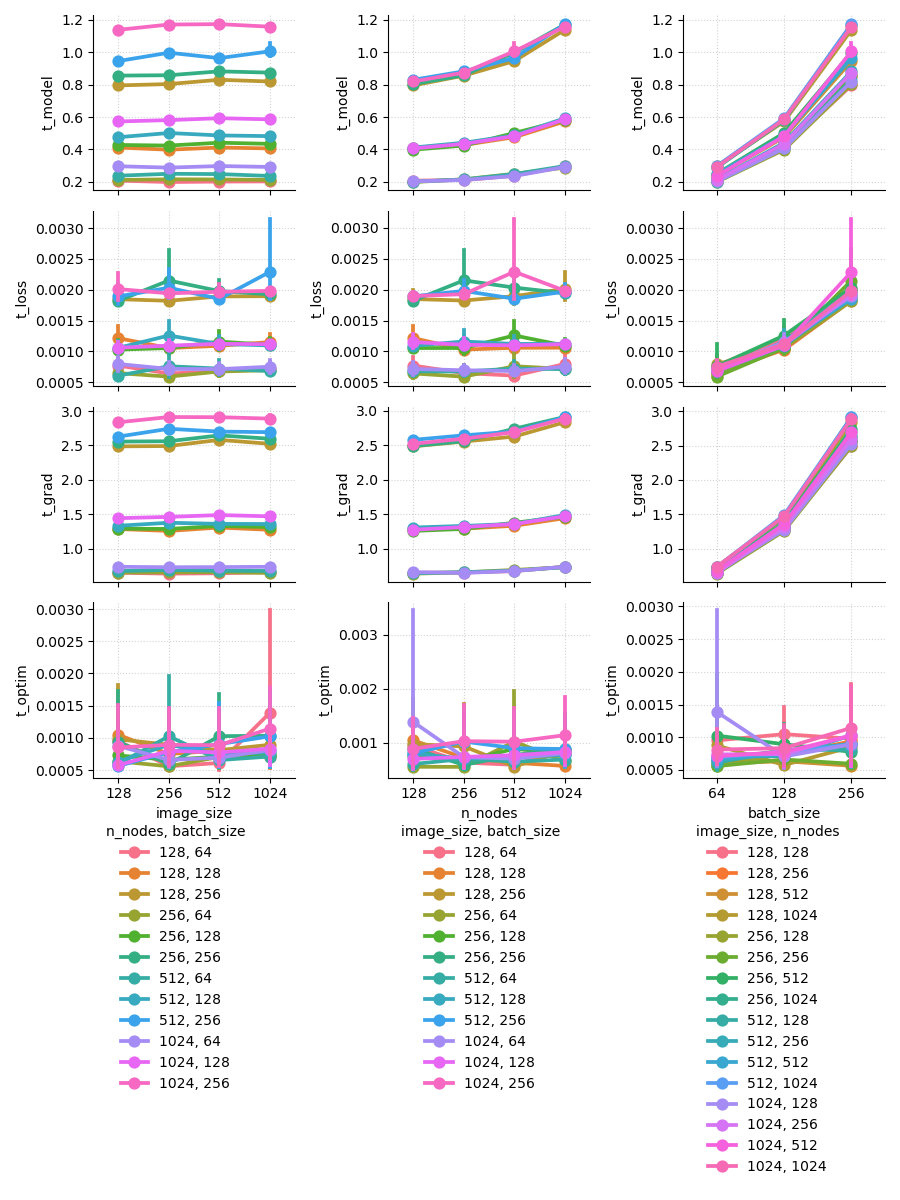

In [19]:
%autoreload
fig = ps.plot(
    m[(m.phase == 'train')],
    x=['image_size', 'n_nodes', 'batch_size'],
    y=['t_model', 't_loss', 't_grad', 't_optim'],
    legend=True,
    legend_kws=dict(bbox_to_anchor=(0, -0.2)),
    tight=True
)